# Neural network learning to recognize faces
### By: Marco Correa 


To run this code make sure you can run Jupyter notebooks to run each code cell. After, place this notebook in the same folder as the faces folder given to us that has all the faces data. Then change the folder variable name to the folder location of where the faces folder is located. After having everything complete you should be able to run this code.

In [1]:
import numpy as np
import os
import cv2
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import classification_report
%matplotlib inline

# Loading in data with sunglasses

In [2]:
#this folder varaible needs to be changed to match the file location where you have the faces data set on your computer
folder = 'C:/Users/gorlo/Documents/College/CSM/DSCI575_ADVML/faces'
features = []
labels = []

#map for labels:
#0 = neutral
#1 = angry
#2 = happy
#3 = sad

for dirPath, dirNames, fileNames in os.walk(folder):
    for fileName in fileNames:
        if fileName.endswith('.pgm'):
            file_path = os.path.join(dirPath, fileName)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64, 64)) / 255
            if "neutral" in fileName:
                label = 0
            elif "angry" in fileName:
                label = 1
            elif "happy" in fileName:
                label = 2
            elif "sad" in fileName:
                label = 3
            else:
                continue
            features.append(image)
            labels.append(label)

features = np.array(features)
labels = np.array(labels)

# Print 3 images from this data set

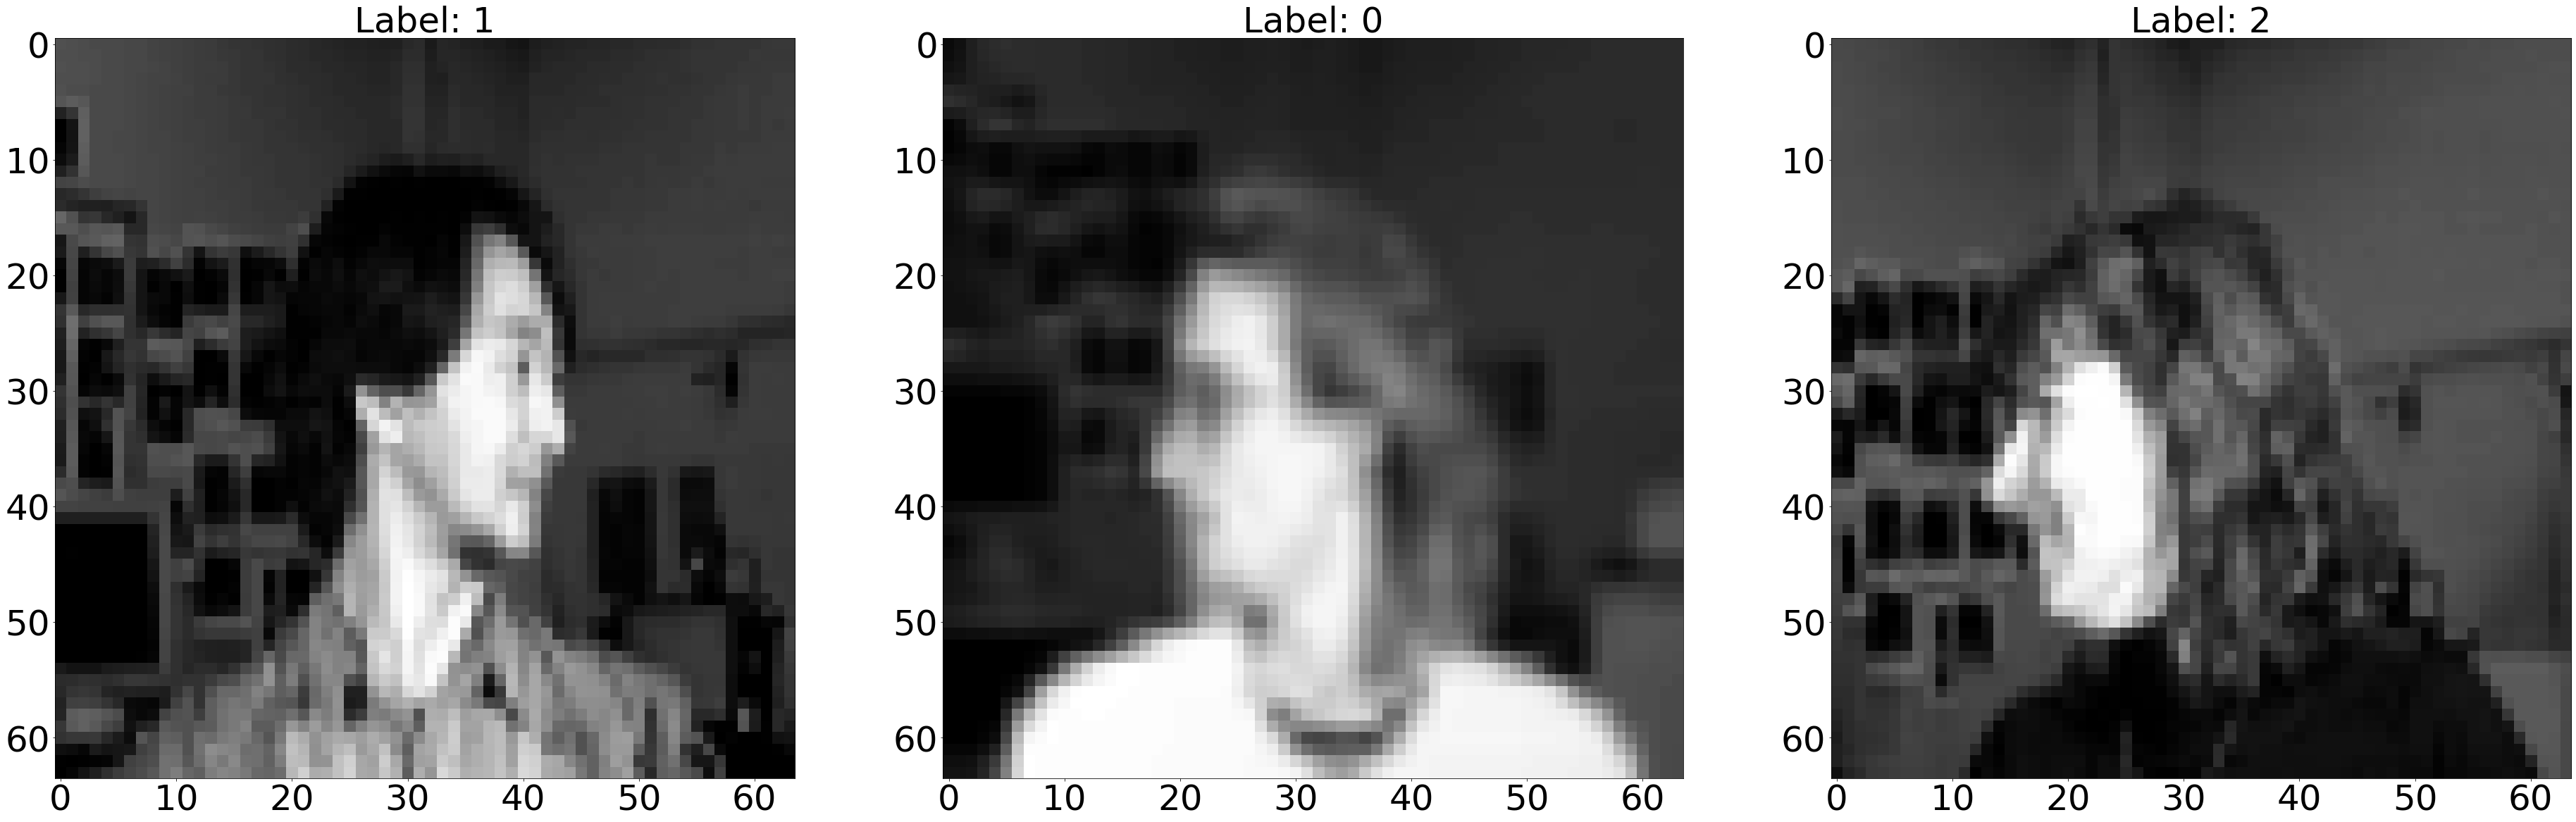

In [3]:
random_image = random.sample(range(len(features)), 3)
fig, ax = plt.subplots(1, 3, figsize=(64, 64))

for i, index in enumerate(random_image):
    ax[i].imshow(features[index], cmap='gray')
    ax[i].tick_params(labelsize = 50)
    ax[i].set_title('Label: {}'.format(labels[index]), fontsize = 50)
plt.show()

# Helper function to plot results of our model training

In [4]:
def plot_results(history):
    epoch_num = np.arange(1, len(history.history['loss'])+1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_num, history.history['loss'], label='training_loss')
    plt.plot(epoch_num, history.history['val_loss'], label='test_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch_num, history.history['accuracy'], label='training_accuracy')
    plt.plot(epoch_num, history.history['val_accuracy'], label='test_accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

# Model with sunglasses

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

model = Sequential([
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size = (2, 2), padding = 'same'),
    Dropout(0.5),
    Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2), padding = 'same'),
    Dropout(0.5),
    Conv2D(filters = 256, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2), padding = 'same'),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='softmax')
])

model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history_with_glasses = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), verbose = 2)
_, accuracy_with_glasses = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy_with_glasses)

Epoch 1/50
47/47 - 7s - loss: 1.6950 - accuracy: 0.2385 - val_loss: 1.5870 - val_accuracy: 0.2453 - 7s/epoch - 154ms/step
Epoch 2/50
47/47 - 6s - loss: 1.4099 - accuracy: 0.2532 - val_loss: 1.7767 - val_accuracy: 0.2587 - 6s/epoch - 136ms/step
Epoch 3/50
47/47 - 7s - loss: 1.4037 - accuracy: 0.2699 - val_loss: 1.5373 - val_accuracy: 0.2453 - 7s/epoch - 143ms/step
Epoch 4/50
47/47 - 6s - loss: 1.3951 - accuracy: 0.2892 - val_loss: 1.5073 - val_accuracy: 0.2720 - 6s/epoch - 137ms/step
Epoch 5/50
47/47 - 6s - loss: 1.4026 - accuracy: 0.2699 - val_loss: 1.5455 - val_accuracy: 0.2587 - 6s/epoch - 132ms/step
Epoch 6/50
47/47 - 6s - loss: 1.3908 - accuracy: 0.2799 - val_loss: 1.5686 - val_accuracy: 0.2453 - 6s/epoch - 133ms/step
Epoch 7/50
47/47 - 7s - loss: 1.3944 - accuracy: 0.2812 - val_loss: 1.4022 - val_accuracy: 0.2560 - 7s/epoch - 139ms/step
Epoch 8/50
47/47 - 6s - loss: 1.3867 - accuracy: 0.2852 - val_loss: 1.4028 - val_accuracy: 0.2640 - 6s/epoch - 134ms/step
Epoch 9/50
47/47 - 6s - 

# Model results with sunglasses

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 128)       0

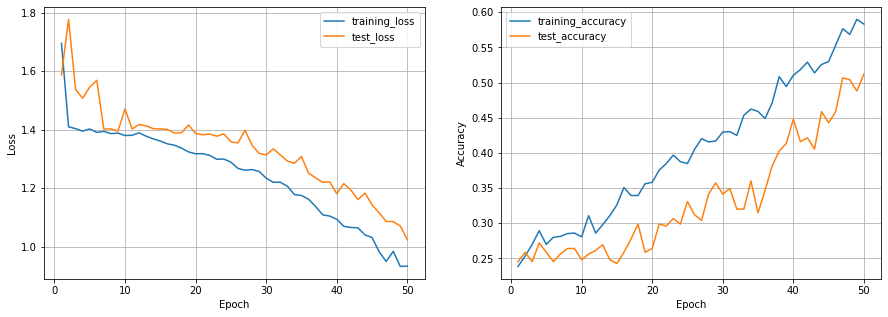

In [6]:
plot_results(history_with_glasses)
model.summary()

# Measure the quality of predictions

In [7]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

target_names = ['neutral', 'angry', 'happy', 'sad']
print(classification_report(y_test, y_pred, target_names=target_names))

12/12 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

     neutral       0.47      0.71      0.57        97
       angry       0.64      0.55      0.59        87
       happy       0.42      0.25      0.31        92
         sad       0.53      0.53      0.53        99

    accuracy                           0.51       375
   macro avg       0.51      0.51      0.50       375
weighted avg       0.51      0.51      0.50       375



# Loading in data without sunglasses

In [8]:
#this folder varaible needs to be changed to match the file location where you have the faces data set on your computer
folder = 'C:/Users/gorlo/Documents/College/CSM/DSCI575_ADVML/faces'
features = []
labels = []

#map for labels:
#0 = neutral
#1 = angry
#2 = happy
#3 = sad

for dirPath, dirNames, fileNames in os.walk(folder):
    for fileName in fileNames:
        if fileName.endswith('.pgm') and "sunglasses" not in fileName:
            file_path = os.path.join(dirPath, fileName)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64, 64)) / 255
            if "neutral" in fileName:
                label = 0
            elif "angry" in fileName:
                label = 1
            elif "happy" in fileName:
                label = 2
            elif "sad" in fileName:
                label = 3
            else:
                continue
            features.append(image)
            labels.append(label)

features = np.array(features)
labels = np.array(labels)

# Print 3 images from this data set

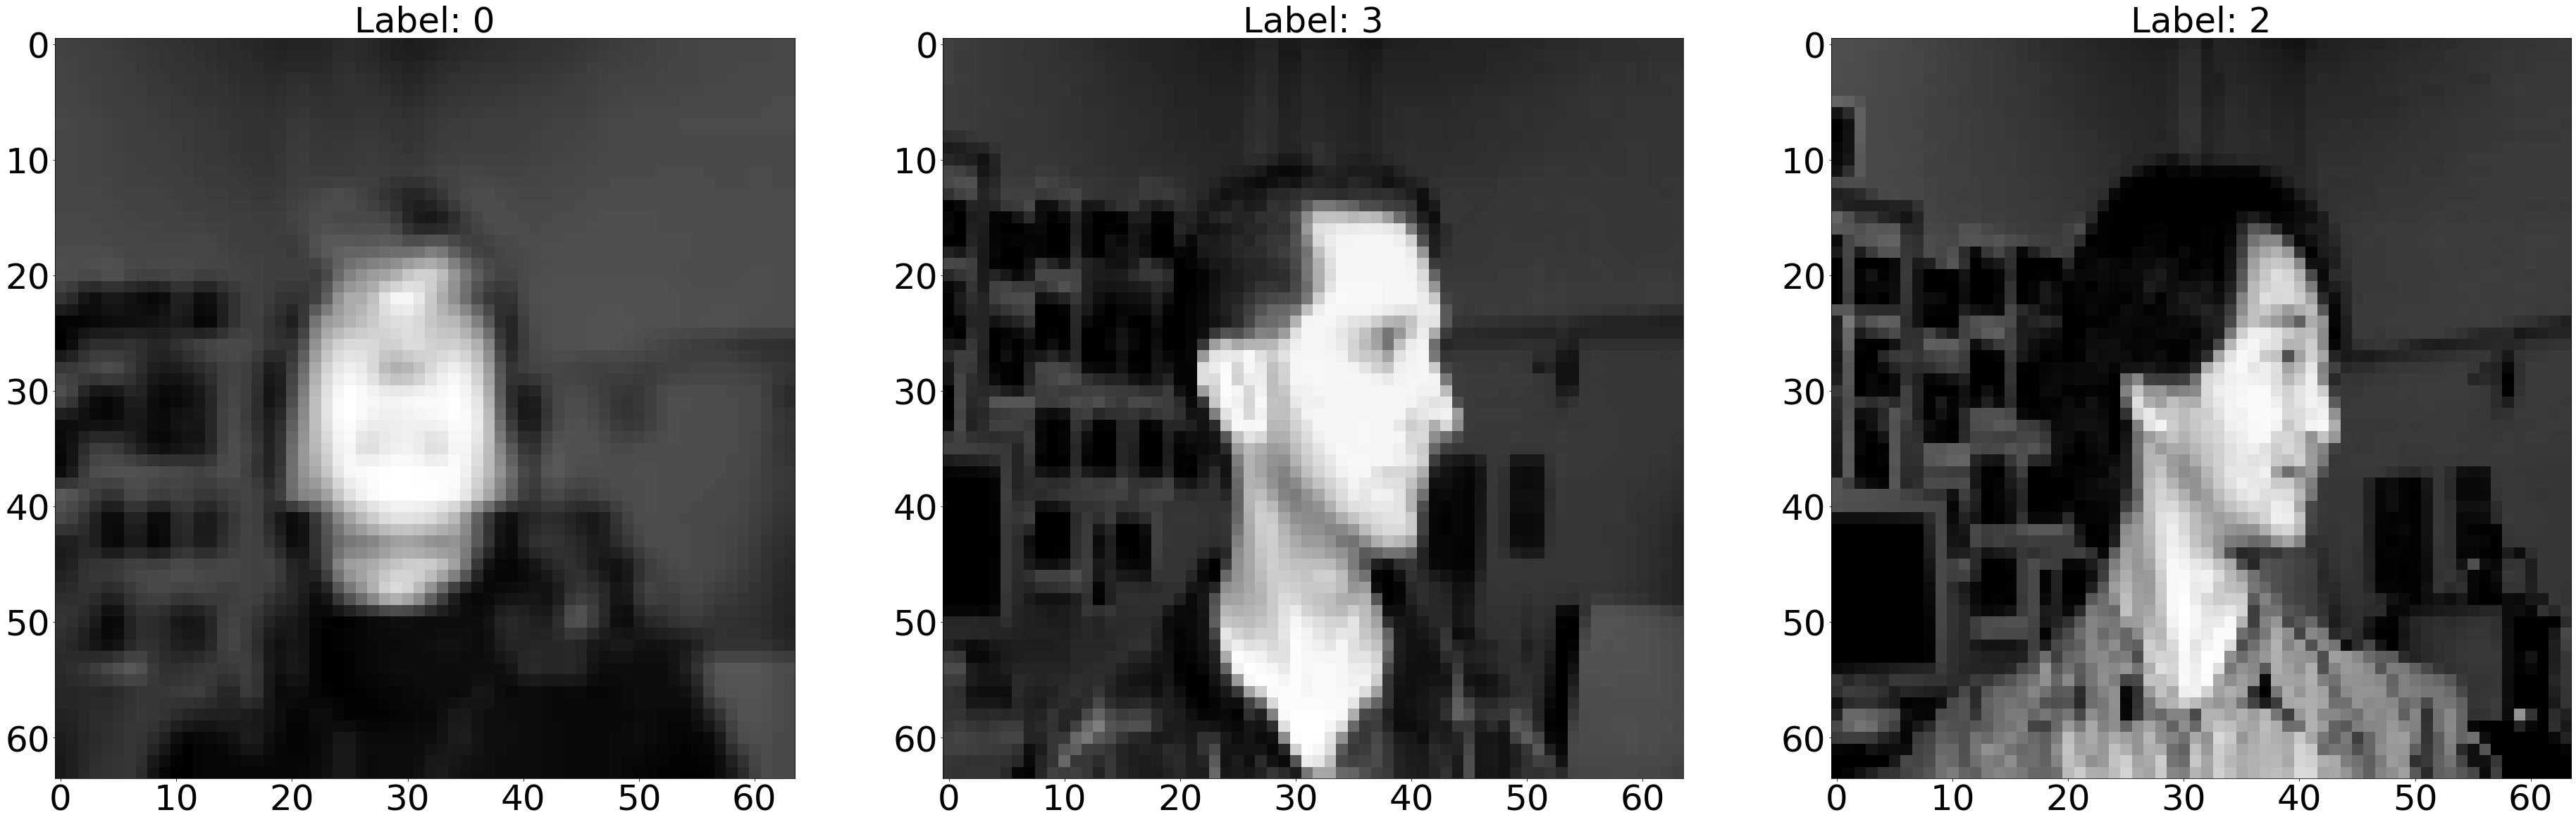

In [9]:
random_image = random.sample(range(len(features)), 3)
fig, ax = plt.subplots(1, 3, figsize=(64, 64))

for i, index in enumerate(random_image):
    ax[i].imshow(features[index], cmap='gray')
    ax[i].tick_params(labelsize = 50)
    ax[i].set_title('Label: {}'.format(labels[index]), fontsize = 50)
plt.show()

# Model without sunglasses

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

model = Sequential([
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size = (2, 2), padding = 'same'),
    Dropout(0.5),
    Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2), padding = 'same'),
    Dropout(0.5),
    Conv2D(filters = 256, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2), padding = 'same'),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='softmax')
])

model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history_without_glasses = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), verbose = 2)
_, accuracy_without_glasses = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy_without_glasses)

Epoch 1/50
24/24 - 4s - loss: 1.8585 - accuracy: 0.2224 - val_loss: 1.7175 - val_accuracy: 0.2128 - 4s/epoch - 155ms/step
Epoch 2/50
24/24 - 3s - loss: 1.4292 - accuracy: 0.2810 - val_loss: 1.6047 - val_accuracy: 0.2606 - 3s/epoch - 130ms/step
Epoch 3/50
24/24 - 3s - loss: 1.3986 - accuracy: 0.2796 - val_loss: 1.8242 - val_accuracy: 0.2500 - 3s/epoch - 130ms/step
Epoch 4/50
24/24 - 3s - loss: 1.4073 - accuracy: 0.2889 - val_loss: 1.7447 - val_accuracy: 0.2447 - 3s/epoch - 130ms/step
Epoch 5/50
24/24 - 3s - loss: 1.4013 - accuracy: 0.2650 - val_loss: 1.7979 - val_accuracy: 0.2926 - 3s/epoch - 132ms/step
Epoch 6/50
24/24 - 3s - loss: 1.3929 - accuracy: 0.2836 - val_loss: 1.7882 - val_accuracy: 0.2606 - 3s/epoch - 130ms/step
Epoch 7/50
24/24 - 3s - loss: 1.3907 - accuracy: 0.2810 - val_loss: 1.5181 - val_accuracy: 0.2660 - 3s/epoch - 130ms/step
Epoch 8/50
24/24 - 3s - loss: 1.3946 - accuracy: 0.2889 - val_loss: 1.4478 - val_accuracy: 0.2606 - 3s/epoch - 131ms/step
Epoch 9/50
24/24 - 3s - 

# Model results without sunglasses

In [ ]:
plot_results(history_without_glasses)
model.summary()

# Measure the quality of predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

target_names = ['neutral', 'angry', 'happy', 'sad']
print(classification_report(y_test, y_pred, target_names=target_names))